<a href="https://colab.research.google.com/github/hadil1999-creator/Small-guided-projects-from-coursera-websites../blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nlp
import nlp


In [ ]:
import tensorflow as tf
import nlp
import matplotlib.pyplot as plt

import numpy as np
import random

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


    
print('Using TensorFlow version', tf.__version__)

In [ ]:
dataset = nlp.load_dataset('emotion')

In [ ]:
dataset

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']


In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [ ]:
tweets, labels = get_tweet(test)
tweets[10], labels[10]


In [ ]:
tweets, labels = get_tweet(val)
tweets[10], labels[10]

('i feel bitchy but not defeated yet', 'anger')

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0], labels[0]
tweets[1], labels[1]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences(['i feel good'])

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)) )
plt.show()


In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tweets[:]

In [ ]:

def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences((sequences), padding ='post' , truncating='post', maxlen = maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer,tweets) 
len(padded_train_seq)

16000

In [ ]:
padded_train_seq[10]

array([  1,   2,  13,   1,  20,   4,  79,   5, 732,   1,  92, 543, 303,
        83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
classes = set(labels)
print(classes)

{'anger', 'sadness', 'fear', 'surprise', 'joy', 'love'}


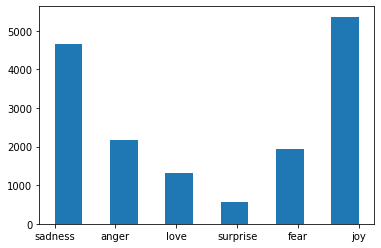

In [ ]:
plt.hist(labels, bins = 11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k, v in class_to_index.items())


In [ ]:
class_to_index

{'anger': 0, 'fear': 2, 'joy': 4, 'love': 5, 'sadness': 1, 'surprise': 3}

In [ ]:
index_to_class

{0: 'anger', 1: 'sadness', 2: 'fear', 3: 'surprise', 4: 'joy', 5: 'love'}

In [ ]:
names_to_ids = lambda labels : np.array( [class_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[0])
len(train_labels)

1


16000

Creating The Model

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Embedding(10000, 15, input_length= maxlen),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)) ,
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
      tf.keras.layers.Dense(6, activation='softmax')                           
                                  
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 15)            150000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5760      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 165,766
Trainable params: 165,766
Non-trainable params: 0
_________________________________________________________________


Train the Model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_labels = names_to_ids(val_labels)
val_seq = get_sequences(tokenizer, val_tweets)
len(val_labels)


2000

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 1)

In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data= (val_seq, val_labels),
    epochs = 20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor ='val_accuracy', patience=2)
    ]

)

Epoch 1/20
500/500 [==============================] - 12s 15ms/step - loss: 1.2958 - accuracy: 0.4916 - val_loss: 0.7891 - val_accuracy: 0.7150
Epoch 2/20
500/500 [==============================] - 6s 13ms/step - loss: 0.5308 - accuracy: 0.8152 - val_loss: 0.5294 - val_accuracy: 0.8190
Epoch 3/20
500/500 [==============================] - 6s 13ms/step - loss: 0.3186 - accuracy: 0.8911 - val_loss: 0.4797 - val_accuracy: 0.8495
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 0.2098 - accuracy: 0.9338 - val_loss: 0.4502 - val_accuracy: 0.8660
Epoch 5/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1530 - accuracy: 0.9530 - val_loss: 0.4065 - val_accuracy: 0.8765
Epoch 6/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.4147 - val_accuracy: 0.8795
Epoch 7/20
500/500 [==============================] - 6s 13ms/step - loss: 0.0914 - accuracy: 0.9717 - val_loss: 0.4153 - val_accuracy: 0.877

Evaluating the model


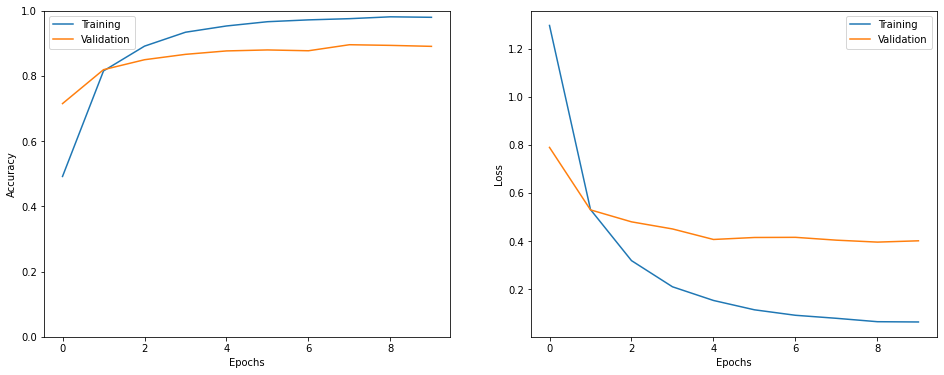

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.4225 - accuracy: 0.8805


In [ ]:
i = random.randint(0, len(test_labels)-1)
print('sentence:', test_tweets[i])
print('emotion:', index_to_class[test_labels[i]])
p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
pred_class = index_to_class[np.argmax(p).astype ('uint8')]
print('predicted emotion:', pred_class)

sentence: i ended the podcast feeling not depressed exactly but like i still didn t have a concrete answer for how to strike that balance that self help authors love to talk about
emotion: sadness
predicted emotion: sadness


//Problem here

In [ ]:

predict=model.predict(test_seq) 
classes=np.argmax(predict,axis=1)

In [ ]:
show_confusion_matrix(test_labels, predict, classes)